# TCM Final Project - Heather and Allen
## Analyzing different cryptocurrencies and their changes over time

**Project description:** For our MAKE project, we decided to use what we learned in class regarding Python and Pandas and analyze a few data questions centered around cryptocurrencies, with the goal of developing a simplified investment outlook on BTC, Ethereum, and Dogecoin!

We also decided to take this project a step further and research how to build visual graphs into Jupyter Notebook as well as make forecasts using exponential smoothing. We accomplished this through pip installing additional libraries like Seaborns, Statsmodel, and Mathplot. 

We pulled a sample dataset from Kaggle: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

**Our BIG question:** When should you invest in cryptocurrencies and which one?

**Some questions we considered:**
1. How did the historical prices / market capitalizations of various currencies change over time?
2. Can we forecast the future price of the currencies? (Heather)
3. Are there seasonal trends in price fluctuations? Cyclical changes? (Allen)
4. How does the price fluctuations of currencies correlate with each other?

# Table of Contents

### I. Introduction & Cleaning

### II. Initial Descriptive Statistics

### III. Question 1

### IV. Question 2

a. Bitcoin

b. Ethereum

c. Dogecoin

d. Litecoin
    
### V. Question 3

a. Bitcoin

b. Ethereum

c. Dogecoin

d. Litecoin

### VIII. Question 4

# 1. Import and Clean Data

In [1]:
#import relevant libraries
#must first pip install seaborn and statsmodels in VSCode

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from datetime import datetime

pd.options.mode.chained_assignment = None

In [2]:
#importing Cyrptocurrency data 
bitcoin = pd.read_csv('coin_Bitcoin.csv')
ether = pd.read_csv('coin_Ethereum.csv')
dogecoin = pd.read_csv('coin_Dogecoin.csv')
litecoin = pd.read_csv('coin_Litecoin.csv')

In [3]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Name       2862 non-null   object 
 2   Symbol     2862 non-null   object 
 3   Date       2862 non-null   object 
 4   High       2862 non-null   float64
 5   Low        2862 non-null   float64
 6   Open       2862 non-null   float64
 7   Close      2862 non-null   float64
 8   Volume     2862 non-null   float64
 9   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 223.7+ KB


In [4]:
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
ether.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [6]:
dogecoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [7]:
litecoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


In [8]:
bitcoin.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11
2861,2862,Bitcoin,BTC,2021-02-27 23:59:59,48253.270101,45269.025766,46344.772237,46188.451275,4.591095e+10,8.609781e+11


## Understand the data

After data is uploaded, we should spend some time understanding the data. Below are definitions of each row of data:

|Variable Name|Definition|
|-------------|----------|
|SNo| Arbitrary number, numbers each row and acts similar to an index|
|Name| Cryptocurreny name|
|Symbol| Crytocurrency symbol|
|Date| Observation date for the coin in the United States|
|High| Highest price on the given day|
|Low| Lowest price on the given day|
|Open| Opening price on the given day|
|Close| Closing price on the given day|
|Volume| Volume of transactions on the given day|
|Market Cap| Market capitalization in USD

In [9]:
# change to datetype
bitcoin['Date'] = bitcoin['Date'].astype(str)
ether['Date'] = ether['Date'].astype(str)
dogecoin['Date'] = dogecoin['Date'].astype(str)
litecoin['Date'] = litecoin['Date'].astype(str)

# remove the time
bitcoin['Date'] = bitcoin['Date'].str.replace(pat = ' 23:59:59', repl ='')
ether['Date'] = ether['Date'].str.replace(pat = ' 23:59:59', repl ='')
dogecoin['Date'] = dogecoin['Date'] .str.replace(pat = ' 23:59:59', repl ='')
litecoin['Date'] = litecoin['Date'] .str.replace(pat = ' 23:59:59', repl ='')

#reformat the date
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], infer_datetime_format=True, format= '%Y%m%d')
ether['Date'] = pd.to_datetime(ether['Date'], infer_datetime_format=True, format= '%Y%m%d')
dogecoin['Date'] = pd.to_datetime(dogecoin['Date'], infer_datetime_format=True, format= '%Y%m%d')
litecoin['Date'] = pd.to_datetime(litecoin['Date'], infer_datetime_format=True, format= '%Y%m%d')

In [10]:
#removing SNo column to clean up columns
bitcoin = bitcoin.drop(['SNo'], axis=1)
ether = ether.drop(['SNo'], axis = 1)
dogecoin = dogecoin.drop(['SNo'], axis=1)
litecoin = litecoin.drop(['SNo'], axis = 1)

bitcoin

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...
2857,Bitcoin,BTC,2021-02-23,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,Bitcoin,BTC,2021-02-24,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,Bitcoin,BTC,2021-02-25,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,Bitcoin,BTC,2021-02-26,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [11]:
#check columns are a float data type so we can use for calculations
bitcoin.dtypes

Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [12]:
#keeping only 2016-2021 data, so all datasets match
bitcoin = bitcoin.loc[(bitcoin["Date"] >= '2016-01-01')]
ether = ether.loc[(ether["Date"] >= '2016-01-01')]
dogecoin = dogecoin.loc[(dogecoin["Date"] >= '2016-01-01')]
litecoin = litecoin.loc[(litecoin['Date'] >= '2016-01-01')]

In [13]:
#create a new column called DailyChange (% change in price between open and closing)
bitcoin['DailyChange'] = (bitcoin['Open'] - bitcoin['Close'])/bitcoin['Open']
ether['DailyChange'] = (ether['Open'] - ether['Close'])/ether['Open']
dogecoin['DailyChange'] = (dogecoin['Open'] - dogecoin['Close'])/dogecoin['Open']
litecoin['DailyChange'] = (litecoin['Open'] - litecoin['Close'])/litecoin['Open']

# 2. Initial Descriptive Statistics

In [14]:
#looking at descriptive statistics for bitcoin
bitcoin_descriptive = bitcoin.describe()
bitcoin_descriptive

,High,Low,Open,Close,Volume,Marketcap,DailyChange
count,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1.885000e+03,1885.000000
mean,7358.253550,6945.864419,7154.465081,7178.293168,1.362054e+10,1.279721e+11,-0.003189
std,7860.880297,7254.949114,7565.134498,7615.710347,1.882449e+10,1.413577e+11,0.039587
min,374.950012,354.914001,365.072998,364.330994,2.851400e+07,5.496598e+09,-0.254702
25%,1251.609985,1215.560059,1231.920044,1231.920044,4.227060e+08,2.006275e+10,-0.017773
50%,6617.350000,6433.870117,6510.069824,6517.180000,5.639320e+09,1.126373e+11,-0.002193
75%,9540.465393,9231.530273,9374.929987,9375.474759,2.068151e+10,1.699888e+11,0.011406
max,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12,0.371869


In [15]:
#looking at descriptive statistics for ether
ether_descriptive = ether.describe()
ether_descriptive

,High,Low,Open,Close,Volume,Marketcap,DailyChange
count,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1.885000e+03,1885.000000
mean,287.676047,266.048742,277.361060,278.064271,5.850077e+09,2.907151e+10,-0.005414
std,325.383998,294.912770,311.369588,312.362349,8.260745e+09,3.386433e+10,0.059219
min,0.954822,0.929835,0.933712,0.937124,2.060620e+05,7.117666e+07,-0.337189
25%,51.274502,48.297100,49.971401,50.037300,1.456020e+08,4.553738e+09,-0.028227
50%,206.361445,194.783997,200.608867,200.635000,2.208720e+09,2.089154e+10,-0.000638
75%,364.438995,341.416992,353.202267,353.362266,8.446546e+09,3.675680e+10,0.020766
max,2036.286493,1896.684508,1959.902977,1960.164744,6.073363e+10,2.249103e+11,0.423088


In [16]:
#looking at descriptive statistics for dogecoin
doge_descriptive = dogecoin.describe()
doge_descriptive

,High,Low,Open,Close,Volume,Marketcap,DailyChange
count,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1.885000e+03,1885.000000
mean,0.003452,0.003017,0.003220,0.003242,1.481319e+08,3.925630e+08,-0.006334
std,0.007852,0.006236,0.006992,0.007055,9.963038e+08,9.029127e+08,0.108158
min,0.000138,0.000134,0.000134,0.000135,4.147720e+04,1.379595e+07,-3.556254
25%,0.000483,0.000436,0.000453,0.000451,1.673200e+06,4.896589e+07,-0.018657
50%,0.002481,0.002327,0.002406,0.002409,1.699374e+07,2.886411e+08,0.001194
75%,0.003244,0.003019,0.003134,0.003140,6.405696e+07,3.717361e+08,0.019641
max,0.084945,0.068525,0.078773,0.078825,2.540331e+10,1.011246e+10,0.397983


In [17]:
#looking at descriptive statistics for litecoin
litecoin_descriptive = litecoin.describe()
litecoin_descriptive

,High,Low,Open,Close,Volume,Marketcap,DailyChange
count,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1.885000e+03,1885.000000
mean,62.773786,57.692113,60.325073,60.398379,1.697506e+09,3.594282e+09,-0.003373
std,59.538790,52.984009,56.452743,56.464574,2.342053e+09,3.297088e+09,0.058186
min,3.055340,2.919460,2.965720,2.996780,5.074800e+05,1.320557e+08,-0.670443
25%,11.002100,9.931880,10.342100,10.421600,6.113700e+07,5.281965e+08,-0.021926
50%,51.252319,47.715779,49.464957,49.458046,4.842540e+08,3.032855e+09,0.000556
75%,79.649200,74.149942,76.931999,76.942497,2.759602e+09,4.723825e+09,0.020017
max,375.286011,335.674988,359.125000,358.335999,1.799426e+10,1.948262e+10,0.361582


In [18]:
#combine all datasets to compare together using append
df_all = bitcoin.append(ether)
df_all = df_all.append(dogecoin)
df_all = df_all.append(litecoin)

df_all

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,DailyChange
977,Bitcoin,BTC,2016-01-01,436.246002,427.515015,430.721008,434.334015,3.627890e+07,6.529300e+09,-0.008388
978,Bitcoin,BTC,2016-01-02,436.062012,431.869995,434.622009,433.437988,3.009660e+07,6.517390e+09,0.002724
979,Bitcoin,BTC,2016-01-03,433.743011,424.705994,433.578003,430.010986,3.963380e+07,6.467430e+09,0.008227
980,Bitcoin,BTC,2016-01-04,434.516998,429.084015,430.061005,433.091003,3.847750e+07,6.515713e+09,-0.007046
981,Bitcoin,BTC,2016-01-05,434.182007,429.675995,433.069000,431.959991,3.452260e+07,6.500393e+09,0.002561
...,...,...,...,...,...,...,...,...,...,...
2857,Litecoin,LTC,2021-02-23,208.369670,159.684673,208.123407,176.934915,1.094470e+10,1.177356e+10,0.149856
2858,Litecoin,LTC,2021-02-24,189.165459,169.789009,176.966769,181.378501,7.205360e+09,1.207051e+10,-0.024930
2859,Litecoin,LTC,2021-02-25,204.743842,176.032145,181.385422,178.901843,7.327999e+09,1.190489e+10,0.013692
2860,Litecoin,LTC,2021-02-26,182.075844,163.248248,179.128519,170.398153,7.875998e+09,1.134030e+10,0.048738


In [19]:
# dataframe to describe and compare individual coins
df_all.groupby("Name")[["Close", "DailyChange"]].describe()

Close                                                     \
           count         mean          std         min          25%   
Name                                                                  
Bitcoin   1885.0  7178.293168  7615.710347  364.330994  1231.920044   
Dogecoin  1885.0     0.003242     0.007055    0.000135     0.000451   
Ethereum  1885.0   278.064271   312.362349    0.937124    50.037300   
Litecoin  1885.0    60.398379    56.464574    2.996780    10.421600   

                                                 DailyChange            \
                  50%          75%           max       count      mean   
Name                                                                     
Bitcoin   6517.180000  9375.474759  57539.943668      1885.0 -0.003189   
Dogecoin     0.002409     0.003140      0.078825      1885.0 -0.006334   
Ethereum   200.635000   353.362266   1960.164744      1885.0 -0.005414   
Litecoin    49.458046    76.942497    358.335999      1885.0 -0.003373   

                                                                      
               std       min       25%       50%       75%       max  
Name                                                                  
Bitcoin   0.039587 -0.254702 -0.017773 -0.002193  0.011406  0.371869  
Dogecoin  0.108158 -3.556254 -0.018657  0.001194  0.019641  0.397983  
Ethereum  0.059219 -0.337189 -0.028227 -0.000638  0.020766  0.423088  
Litecoin  0.058186 -0.670443 -0.021926  0.000556  0.020017  0.361582

## Question 1 - How did the historical prices / market capitalizations of various currencies change over time?

Text(0.5, 1.0, 'Litecoin')

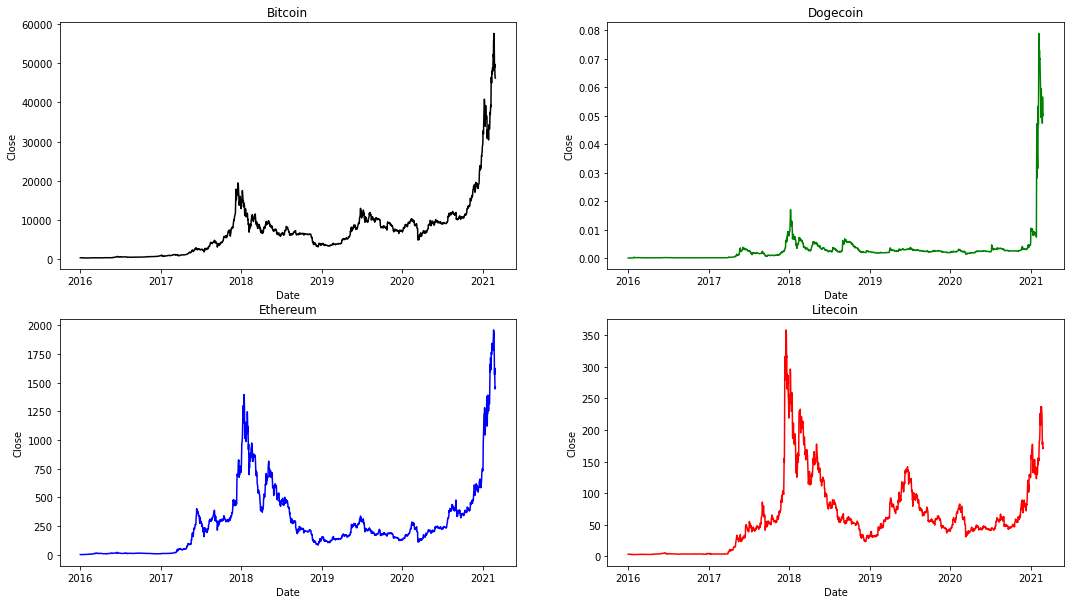

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(18,10)

#Bitcoin graph
ax = sns.lineplot(data = bitcoin, x = "Date", y = "Close", ax=axs[0, 0], color='black')
ax.set_title('Bitcoin')

#Ethereum graph
ax2 = sns.lineplot(data = ether, x = "Date", y = "Close", ax=axs[1, 0], color='blue')
ax2.set_title('Ethereum')

#Dogecoin graph
ax3 = sns.lineplot(data = dogecoin, x = "Date", y = "Close", ax=axs[0, 1], color='green')
ax3.set_title('Dogecoin')

#Litecoin graph
ax4 = sns.lineplot(data = litecoin, x = "Date", y = "Close", ax=axs[1, 1], color='red')
ax4.set_title('Litecoin')

hi allen idk how to label each individaul graph 

hi heather - i gotchu!

**Takeaway:** Generally looking at the graphs, we see a corresponding spike in 2018 followed by a small spike in mid 2019 and a surge in 2021 in all respective cryptocurrencies. Dogecoin doesn't follow the pattern as precisely as the other three

## Question 2 - Can we forecast the future price of the currencies?

## A. Bitcoin

### Simple Exponential Smoothing
![SEM2.jpg](SEM2.jpg)

In [21]:
bitcoin_q2 = bitcoin.loc[(bitcoin['Date'] >= '2020-01-01')]
ether_q2 = ether.loc[(ether['Date'] >= '2020-01-01')]
dogecoin_q2 = dogecoin.loc[(dogecoin['Date'] >= '2020-01-01')]
litecoin_q2 = litecoin.loc[(litecoin['Date'] >= '2020-01-01')]

bitcoin_q2['Day'] = bitcoin_q2['Date'].dt.day
ether_q2['Day'] = ether_q2['Date'].dt.day
dogecoin_q2['Day'] = dogecoin_q2['Date'].dt.day
litecoin_q2['Day'] = litecoin_q2['Date'].dt.day

bitcoin_q2.index = bitcoin_q2['Date']
ether_q2.index = ether_q2['Date']
dogecoin_q2.index = dogecoin_q2['Date']
litecoin_q2.index = litecoin_q2['Date']

In [22]:
bitcoin_q2 = bitcoin_q2.asfreq("15D")
ether_q2 = ether_q2.asfreq("15D")
dogecoin_q2 = dogecoin_q2.asfreq("15D")
litecoin_q2 = litecoin_q2.asfreq("15D")

In [23]:
var1 = bitcoin_q2['Close']
var2 = ether_q2['Close']
var3 = dogecoin_q2['Close']
var4 = litecoin_q2['Close']

In [24]:
fit1_bitcoin = SimpleExpSmoothing(var1).fit(optimized = True)
fit1_bitcoin.summary()

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,Close,No. Observations:,29
Model:,SimpleExpSmoothing,SSE,499538428.419
Optimized:,True,AIC,487.195
Trend:,None,BIC,489.930
Seasonal:,None,AICC,488.862
Seasonal Periods:,None,Date:,"Sun, 02 May 2021"
Box-Cox:,False,Time:,17:12:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,7200.1744,l.0,True


In [25]:
# Create a forecast and visualize
# some string formatting here to make the graph look nicer
# $ calls latex so that alpha will look like greek symbol
# we are forecasting ahead 3 periods, so we're looking at March 1, March 15, and April 1

fcast1 = fit1_bitcoin.forecast(4).rename("Simple EM")

fcast1

2021-03-11    49688.860044
2021-03-26    49688.860044
2021-04-10    49688.860044
2021-04-25    49688.860044
Freq: 15D, Name: Simple EM, dtype: float64

### Double Exponential Smoothing
![DEM2.jpg](DEM2.jpg)

In [26]:
fit2_bitcoin = Holt(var1).fit()
fit2_bitcoin.summary()

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Close,No. Observations:,29
Model:,Holt,SSE,338661836.837
Optimized:,True,AIC,479.923
Trend:,Additive,BIC,485.392
Seasonal:,None,AICC,483.741
Seasonal Periods:,None,Date:,"Sun, 02 May 2021"
Box-Cox:,False,Time:,17:12:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5471429,alpha,True
smoothing_trend,0.5471429,beta,True


In [27]:
fcast2 = fit2_bitcoin.forecast(4).rename("Double EM")

fcast2

2021-03-11    56183.459040
2021-03-26    62435.664621
2021-04-10    68687.870203
2021-04-25    74940.075784
Freq: 15D, Name: Double EM, dtype: float64

### Compare with Actual Data from the last two months

How accurate are our simple and double exponential smoothing models in predicting Bitcoins prices? Our dataset's last date was February 24. We were able to pull prices from https://www.coindesk.com/price/bitcoin to look at March 11 through April 25's Bitcoin price data and compare it to our forecasts.

In [28]:
#From data 
actual2021 = pd.DataFrame(data = {'Close' : [57636.76, 54483.05, 59295.95,48542.95],\
                                 'Open': [55898.86, 51344.05, 58149.65, 50177.24]},
                         index= pd.date_range('2021-03-11', '2021-04-25', freq='15D'))

actual2021

,Close,Open
2021-03-11,57636.76,55898.86
2021-03-26,54483.05,51344.05
2021-04-10,59295.95,58149.65
2021-04-25,48542.95,50177.24


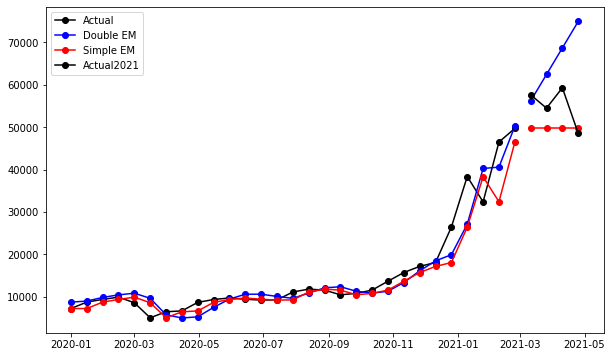

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(var1, marker='o', color='black', label = 'Actual')
plt.plot(fit2_bitcoin.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast2, marker='o', color='blue', label = fcast2.name)
plt.plot(fit1_bitcoin.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast1, marker='o', color='red', label=fcast1.name)
plt.plot(actual2021['Close'], marker='o', color='black', label='Actual2021')

plt.legend()

**Observations**: Double exponential, which takes more into account past trends, predicted accurately the data closest to it (March 11). Simple exponential smoothing was almost accurate for the more recent day (April 25). also for the most part the forecast follows trend...? this doesn't make sense, will need to look more into what exponential smoothing actually is lmao

## B. Ethereum

In [32]:
fit1_ether = SimpleExpSmoothing(var2).fit(optimized = True)

fcast1_ether = fit1_ether.forecast(4).rename("Simple EM")
fcast1_ether

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2021-03-11    1627.271903
2021-03-26    1627.271903
2021-04-10    1627.271903
2021-04-25    1627.271903
Freq: 15D, Name: Simple EM, dtype: float64

In [33]:
fit2_ether = Holt(var2).fit()

fcast2_ether = fit2_ether.forecast(4).rename("Double EM")
fcast2_ether

2021-03-11    1833.039204
2021-03-26    1986.942511
2021-04-10    2140.845818
2021-04-25    2294.749126
Freq: 15D, Name: Double EM, dtype: float64

In [31]:
#From data 
actual2021_ether = pd.DataFrame(data = {'Close' : [1822.23, 1681.91, 2118.71, 2276.23],\
                                 'Open': [1796.47, 1587.23, 2067.66, 2219.56]},
                         index= pd.date_range('2021-03-11', '2021-04-25', freq='15D'))

actual2021_ether

,Close,Open
2021-03-11,1822.23,1796.47
2021-03-26,1681.91,1587.23
2021-04-10,2118.71,2067.66
2021-04-25,2276.23,2219.56


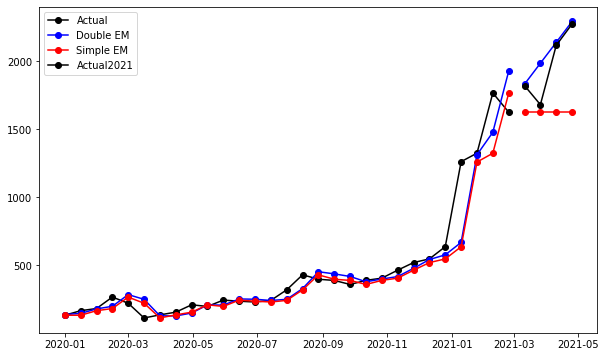

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(var2, marker='o', color='black', label = 'Actual')
plt.plot(fit2_ether.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast2_ether, marker='o', color='blue', label = fcast2_ether.name)
plt.plot(fit1_ether.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast1_ether, marker='o', color='red', label=fcast1_ether.name)
plt.plot(actual2021_ether['Close'], marker='o', color='black', label='Actual2021')

plt.legend()

**Observations**: Double exponential smoothing and simple exponential smoothing both had a bit of a lag in actually staying with the past data, which you can see more clearly in January of 2021 where the blue and red lines are shifted to the right of the Actual data. However, the double exponential smoothing forecast was surprisingly accurate in predicting 3 out of the 4 periods in the extrapolated two months. 

## C. Dogecoin

In [35]:
fit1_dogecoin = SimpleExpSmoothing(var3).fit(optimized = True)

fcast1_dogecoin = fit1_dogecoin.forecast(4).rename("Simple EM")
fcast1_dogecoin

2021-03-11    0.056786
2021-03-26    0.056786
2021-04-10    0.056786
2021-04-25    0.056786
Freq: 15D, Name: Simple EM, dtype: float64

In [36]:
fit2_dogecoin = Holt(var3).fit()

fcast2_dogecoin = fit2_dogecoin.forecast(4).rename("Double EM")
fcast2_dogecoin

2021-03-11    0.075287
2021-03-26    0.092477
2021-04-10    0.109666
2021-04-25    0.126855
Freq: 15D, Name: Double EM, dtype: float64

In [37]:
#From data 
actual2021_dogecoin = pd.DataFrame(data = {'Close' : [.056, .054, .064, .248],\
                                 'Open': [.056, .051, .062, .271]},
                         index= pd.date_range('2021-03-11', '2021-04-25', freq='15D'))

actual2021_dogecoin

,Close,Open
2021-03-11,0.056,0.056
2021-03-26,0.054,0.051
2021-04-10,0.064,0.062
2021-04-25,0.248,0.271


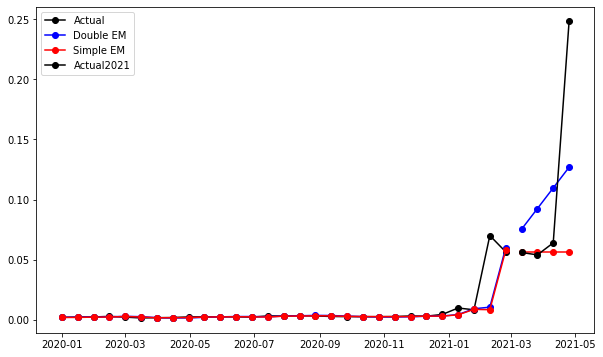

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(var3, marker='o', color='black', label = 'Actual')
plt.plot(fit2_dogecoin.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast2_dogecoin, marker='o', color='blue', label = fcast2_dogecoin.name)
plt.plot(fit1_dogecoin.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast1_dogecoin, marker='o', color='red', label=fcast1_dogecoin.name)
plt.plot(actual2021_dogecoin['Close'], marker='o', color='black', label='Actual2021')

plt.legend()

## D. Litecoin

In [39]:
fit1_litecoin = SimpleExpSmoothing(var4).fit(optimized = True)

fcast1_litecoin = fit1_litecoin.forecast(4).rename("Simple EM")
fcast1_litecoin

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2021-03-11    181.378623
2021-03-26    181.378623
2021-04-10    181.378623
2021-04-25    181.378623
Freq: 15D, Name: Simple EM, dtype: float64

In [40]:
fit2_litecoin = Holt(var4).fit()

fcast2_litecoin = fit2_litecoin.forecast(4).rename("Double EM")
fcast2_litecoin

2021-03-11    186.551672
2021-03-26    191.509542
2021-04-10    196.467412
2021-04-25    201.425282
Freq: 15D, Name: Double EM, dtype: float64

In [41]:
#From data 
actual2021_litecoin = pd.DataFrame(data = {'Close' : [200.56, 182.27, 245.25,219.52],\
                                 'Open': [200.42, 171.65, 221.12, 225.41]},
                         index= pd.date_range('2021-03-11', '2021-04-25', freq='15D'))

actual2021_litecoin

,Close,Open
2021-03-11,200.56,200.42
2021-03-26,182.27,171.65
2021-04-10,245.25,221.12
2021-04-25,219.52,225.41


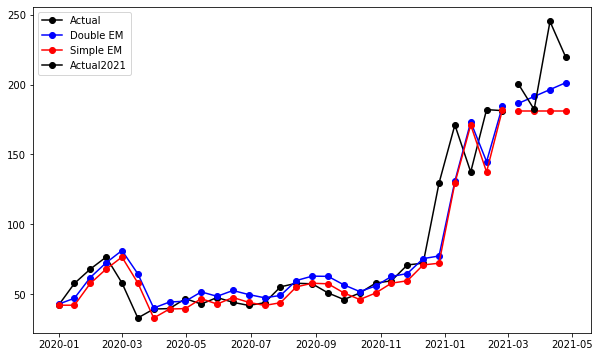

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(var4, marker='o', color='black', label = 'Actual')
plt.plot(fit2_litecoin.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast2_litecoin, marker='o', color='blue', label = fcast2_litecoin.name)
plt.plot(fit1_litecoin.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast1_litecoin, marker='o', color='red', label=fcast1_litecoin.name)
plt.plot(actual2021_litecoin['Close'], marker='o', color='black', label='Actual2021')

plt.legend()

## Question 3 - Are there seasonal trends or cyclical changes in price fluctuations? 

Yes, we can see the differences between double and simple exponential and the seasonality adjusted projections from triple exponential smoothing.


### Correcting for seasonality using Triple Exponenetial Smoothing

**What is Triple Exponential Smoothing?**  

In TEM, a forecast is a smoothed value fo past actuals plus trend in the smoothed values, adjusted for seasonality.

**Why is this relevant to our dataset?**

Our forecasts are in 3 month increments, and during certain quarters, people might be more willing to invest in crytpo, receive a jump in income, or make portfolio adjustments. Seasonality adjustments allow our forecast to adjust for a these types of jumps. We will still have an initial level and perhaps a trend (if that level is moving up or down) but now we will also have an adjustment based on which quarter we are in. This is our seasonality adjustment and it is added in as a multiplicative factor. Instead of adding another term, we multiply the whole forecast by a index that varies by quarter.

**How did we do it?**

We used the function ```ExponentialSmoothing``` and used some additional arguments:
- variable that is being forecasted, as before
- seasonal_periods = frequency of seasons (4 quarters)
- trend= 'add' says add the trend to the forecast as opposed to multiplying 
- seasonal = 'mul' says to multiply the seasonality, as opposed to adding it

We use the same fit, forecast, and summary methods as before.

In [43]:
# cleaning dataframe and indexing dates

bitcoin_season = bitcoin
ether_season = ether
dogecoin_season = dogecoin

bitcoin_season['Day'] = bitcoin['Date'].dt.day
ether_season['Day'] = ether['Date'].dt.day
dogecoin_season['Day'] = dogecoin['Date'].dt.day

bitcoin_season.index = bitcoin_season['Date']
ether_season.index = ether_season['Date']
dogecoin_season.index = dogecoin_season['Date']

In [44]:
#3 months = one quarter, using that increment as our frequency

bitcoin_season = bitcoin_season.asfreq("3M")
ether_season = ether_season.asfreq("3M")
dogecoin_season = dogecoin_season.asfreq("3M")

In [45]:
#create variables
var10 = bitcoin_season['Close']
var20 = ether_season['Close']
var30 = dogecoin_season['Close']

In [46]:
# simple smoothing summary for bitcoin
fit10_bitcoin = SimpleExpSmoothing(var10).fit(optimized = True)
fit10_bitcoin.summary()

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Close,No. Observations:,21
Model:,SimpleExpSmoothing,SSE,457960406.583
Optimized:,True,AIC,358.853
Trend:,None,BIC,360.942
Seasonal:,None,AICC,361.353
Seasonal Periods:,None,Date:,"Sun, 02 May 2021"
Box-Cox:,False,Time:,18:44:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,368.76700,l.0,True


In [47]:
# Create a forecast and visualize
# some string formatting here to make the graph look nicer
# $ calls latex so that alpha will look like greek symbol
# we are forecasting ahead 4 periods, so we're looking at q1, q2, and q3, q4 

fcast10 = fit10_bitcoin.forecast(4).rename("Simple EM")

fcast10

2021-04-30    33017.629161
2021-07-31    33017.629161
2021-10-31    33017.629161
2022-01-31    33017.629161
Freq: 3M, Name: Simple EM, dtype: float64

In [48]:
#using Holt model
fit20_bitcoin = Holt(var10).fit()
fit20_bitcoin.summary()

Dep. Variable:,Close,No. Observations:,21
Model:,Holt,SSE,386452922.772
Optimized:,True,AIC,359.288
Trend:,Additive,BIC,363.466
Seasonal:,None,AICC,365.288
Seasonal Periods:,None,Date:,"Sun, 02 May 2021"
Box-Cox:,False,Time:,18:45:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9478571,alpha,True
smoothing_trend,0.9478571,beta,True


In [49]:
#double exponential smoothing forecast, based off Holt

fcast20 = fit20_bitcoin.forecast(4).rename("Double EM")

fcast20

2021-04-30     49889.189776
2021-07-31     67537.687910
2021-10-31     85186.186044
2022-01-31    102834.684178
Freq: 3M, Name: Double EM, dtype: float64

In [50]:
# seasonality adjusted, triple exponential smoothing
fit30_bitcoin = ExponentialSmoothing(var10, seasonal_periods=4, trend='add', seasonal='mul').fit()

fit30_bitcoin.summary()

c:\users\heather\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Close,No. Observations:,21
Model:,ExponentialSmoothing,SSE,487371114.752
Optimized:,True,AIC,372.160
Trend:,Additive,BIC,380.516
Seasonal:,Multiplicative,AICC,394.160
Seasonal Periods:,4,Date:,"Sun, 02 May 2021"
Box-Cox:,False,Time:,18:45:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8182143,alpha,True
smoothing_trend,0.8182143,beta,True


In [51]:
# triple exponential smoothing forecasts

fcast30 = fit30_bitcoin.forecast(4).rename("Triple EM")

fcast30

2021-04-30    44202.563866
2021-07-31    50922.615420
2021-10-31    61084.268959
2022-01-31    80968.576316
Freq: 3M, Name: Triple EM, dtype: float64

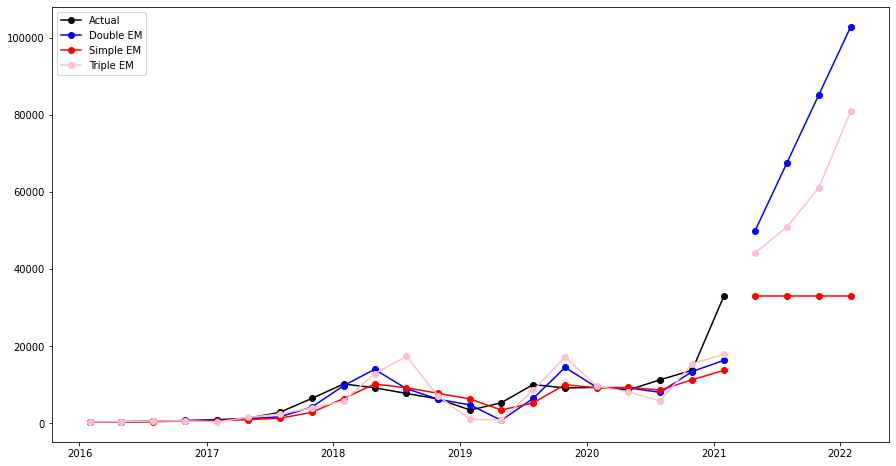

In [52]:
# triple exponential smoothing graph - adjusting for seasonality, forecasting the next 4 quarters 

plt.figure(figsize=(15, 8))
plt.plot(var10, marker='o', color='black', label = 'Actual')
plt.plot(fit20_bitcoin.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast20, marker='o', color='blue', label = fcast20.name)
plt.plot(fit10_bitcoin.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast10, marker='o', color='red', label=fcast10.name)
# plt.plot(actual2021['Close'], marker='o', color='black', label='Actual2021')
line3, = plt.plot(fcast30, marker='o', color='pink', label=fcast30.name)
plt.plot(fit30_bitcoin.fittedvalues, marker='o', color='pink')

plt.legend()

## Ethereum

In [53]:
#create simple exponential smoothing model for ether
fit10_ether = SimpleExpSmoothing(var20).fit(optimized = True)
#forecast 4 periods using simple exponential smoothing model  for ether
fcast20 = fit10_ether.forecast(4).rename("Simple EM")
# fit the points
fit20_ether = Holt(var20).fit()
#forecast 4 periods using double exponential smoothing model
fcast30 = fit20_ether.forecast(4).rename("Double EM")
#create triple exponential smoothing model for ether, adjusts for seasonality
fit30_ether = ExponentialSmoothing(var20, seasonal_periods=4, trend='add', seasonal='mul').fit()
#forecast 4 periods using triple exponential smoothing model
fcast40 = fit30_ether.forecast(4).rename("Triple EM")

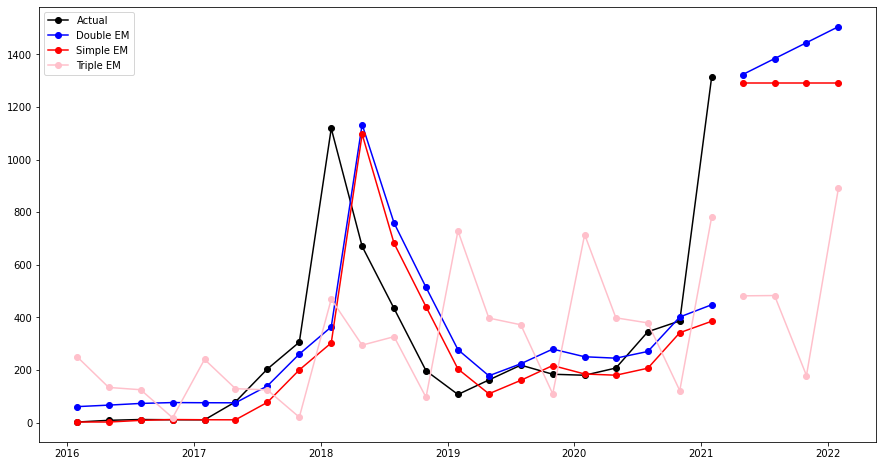

In [54]:
# triple exponential smoothing graph - adjusting for seasonality, forecasting the next 4 quarters 

plt.figure(figsize=(15, 8))
plt.plot(var20, marker='o', color='black', label = 'Actual')
plt.plot(fit20_ether.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast30, marker='o', color='blue', label = fcast30.name)
plt.plot(fit10_ether.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast20, marker='o', color='red', label=fcast20.name)
# plt.plot(actual2021['Close'], marker='o', color='black', label='Actual2021')
line3, = plt.plot(fcast40, marker='o', color='pink', label=fcast40.name)
plt.plot(fit30_ether.fittedvalues, marker='o', color='pink')

plt.legend()

## Dogecoin

In [55]:
#create simple exponential smoothing model for ether
fit10_doge = SimpleExpSmoothing(var30).fit(optimized = True)
#forecast 4 periods using simple exponential smoothing model  for ether
fcast30 = fit10_doge.forecast(4).rename("Simple EM")
# fit the points
fit20_doge = Holt(var30).fit()
#forecast 4 periods using double exponential smoothing model
fcast40 = fit20_doge.forecast(4).rename("Double EM")
#create triple exponential smoothing model for ether, adjusts for seasonality
fit30_doge = ExponentialSmoothing(var30, seasonal_periods=4, trend='add', seasonal='mul').fit()
#forecast 4 periods using triple exponential smoothing model
fcast50 = fit30_doge.forecast(4).rename("Triple EM")

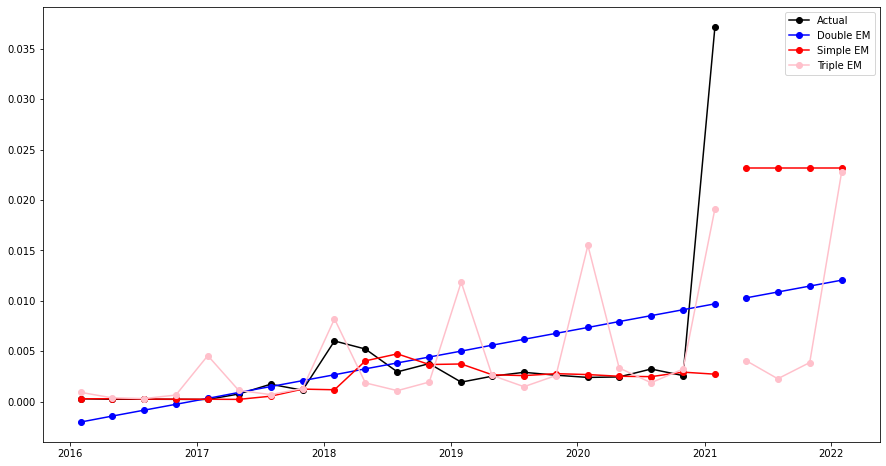

In [56]:
# triple exponential smoothing graph - adjusting for seasonality, forecasting the next 4 quarters 

plt.figure(figsize=(15, 8))
plt.plot(var30, marker='o', color='black', label = 'Actual')
plt.plot(fit20_doge.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast40, marker='o', color='blue', label = fcast40.name)
plt.plot(fit10_doge.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast30, marker='o', color='red', label=fcast30.name)
# plt.plot(actual2021['Close'], marker='o', color='black', label='Actual2021')
line3, = plt.plot(fcast50, marker='o', color='pink', label=fcast50.name)
plt.plot(fit30_doge.fittedvalues, marker='o', color='pink')

plt.legend()

## Question 4 - How does the price fluctuations of currencies correlate with each other?
We want to investiage the correlations in price changes between the different coins, since less correlation allows for investors to diversify away some risk by purchasing different coins.